In [45]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_excel('2010-2020 train.xlsx')
df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),행정구역
0,강원특별자치도,횡성군,2010,44254,15,16,280,410,201,94,7229,37025,강원특별자치도 횡성군
1,강원특별자치도,횡성군,2011,44360,14,16,247,439,179,117,7154,37206,강원특별자치도 횡성군
2,강원특별자치도,횡성군,2012,44615,14,16,261,431,194,87,6942,37673,강원특별자치도 횡성군
3,강원특별자치도,횡성군,2013,44937,14,16,204,450,194,90,6765,38172,강원특별자치도 횡성군
4,강원특별자치도,횡성군,2014,45373,13,16,207,480,211,107,6648,38725,강원특별자치도 횡성군
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,경기도,가평군,2016,62448,16,13,363,608,269,143,8599,53849,경기도 가평군
2449,경기도,가평군,2017,62973,16,13,362,605,269,147,8367,54606,경기도 가평군
2450,경기도,가평군,2018,62918,15,13,301,662,244,177,8094,54824,경기도 가평군
2451,경기도,가평군,2019,62415,14,13,261,642,272,139,7755,54660,경기도 가평군


In [47]:
df = df.drop((["행정구역(시도)","총인구수-학령인구(명)","행정구역","행정구역(시군구)","유치원 수","출생건수","혼인건수","연도","초등학교 수","사망건수","이혼건수"]), axis=1)
df

,총인구수(명),학령인구(명)
0,44254,7229
1,44360,7154
2,44615,6942
3,44937,6765
4,45373,6648
...,...,...
2448,62448,8599
2449,62973,8367
2450,62918,8094
2451,62415,7755


In [49]:
chunk_size = 11
chunks = [df.iloc[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

# 결과 확인
for chunk in chunks:
    print(chunk)
    print("\n" + "="*40 + "\n")

    총인구수(명)  학령인구(명)
0     44254     7229
1     44360     7154
2     44615     6942
3     44937     6765
4     45373     6648
5     45777     6588
6     45991     6353
7     46281     6188
8     46726     5941
9     46575     5679
10    46472     5394


    총인구수(명)  학령인구(명)
11    24364     3981
12    24945     3986
13    25020     3953
14    25079     3936
15    27143     4205
16    27020     3906
17    26264     3569
18    26022     3493
19    25084     3266
20    24917     3195
21    24857     3077


    총인구수(명)  학령인구(명)
22    69368    13064
23    68985    12923
24    68378    12621
25    67829    12387
26    66772    11834
27    65848    11359
28    65303    10920
29    64680    10502
30    63933     9989
31    62737     9401
32    62522     8984


    총인구수(명)  학령인구(명)
33   505838   102533
34   516765   104856
35   525490   107298
36   530251   109618
37   540862   112051
38   596525   121415
39   640890   128503
40   691086   136096
41   758722   147357
42   815396   156241
43   85

In [51]:
# 각 변수에 대해 가중치 계산
for chunk in chunks:
    for col in ['총인구수(명)']:
        chunk[f'Weight_{col}'] = (chunk[col].shift(-1) - chunk[col]) / chunk[col]

# 첫 번째 청크에 대해는 NaN 값이 들어갈 것이므로, 이를 0으로 채워줍니다.
chunks[0].fillna(0, inplace=True)

chunks

[    총인구수(명)  학령인구(명)  Weight_총인구수(명)
 0     44254     7229        0.002395
 1     44360     7154        0.005748
 2     44615     6942        0.007217
 3     44937     6765        0.009702
 4     45373     6648        0.008904
 5     45777     6588        0.004675
 6     45991     6353        0.006306
 7     46281     6188        0.009615
 8     46726     5941       -0.003232
 9     46575     5679       -0.002211
 10    46472     5394        0.000000,
     총인구수(명)  학령인구(명)  Weight_총인구수(명)
 11    24364     3981        0.023847
 12    24945     3986        0.003007
 13    25020     3953        0.002358
 14    25079     3936        0.082300
 15    27143     4205       -0.004532
 16    27020     3906       -0.027979
 17    26264     3569       -0.009214
 18    26022     3493       -0.036046
 19    25084     3266       -0.006658
 20    24917     3195       -0.002408
 21    24857     3077             NaN,
     총인구수(명)  학령인구(명)  Weight_총인구수(명)
 22    69368    13064       -0.005521
 23    689

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# 선택한 열
selected_columns = ['Weight_총인구수(명)']

# 기존 값들을 저장할 딕셔너리
original_values = {}

# 예측 결과를 저장할 딕셔너리
predicted_values = {}

# 새로운 열을 추가할 딕셔너리
new_column_values = {}

for i, chunk in enumerate(chunks):
    print(f"Processing Chunk {i + 1}")

    # 각 chunk에서 선택한 열의 데이터 가져오기 (마지막 행 제외)
    column_data = chunk[selected_columns[0]].tolist()[:-1]

    # 기존 값들을 저장
    key = f"{selected_columns[0]}_Chunk{i + 1}_Original"
    original_values[key] = column_data

    # 학습 데이터
    train_data = np.array(column_data)
    train_data_scaled = StandardScaler().fit_transform(train_data.reshape(-1, 1))

    # 모델 생성
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='tanh', input_shape=(1,)),
        tf.keras.layers.Dense(10, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])

    # 모델 컴파일
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 모델 학습
    model.fit(train_data_scaled[:-1], train_data_scaled[1:], epochs=100, verbose=0)

    # 다음 값을 예측
    next_value_scaled = model.predict(train_data_scaled[-1].reshape(1, 1))
    next_value = -StandardScaler().fit(train_data.reshape(-1, 1)).inverse_transform(next_value_scaled)

    # 예측값을 기존 데이터에 추가
    column_data += [next_value[0, 0]]
    predicted_values[key] = column_data

    # 새로운 열을 추가할 딕셔너리에 저장
    new_column_values[key] = next_value[0, 0] * chunk['총인구수(명)'].iloc[-1] + chunk['총인구수(명)'].iloc[-1]

# 예측 결과 및 기존 값 출력
for key, values in predicted_values.items():
    print(f"{key} Values with Prediction:")
    print(values)
    print("=" * 40)

# 새로운 열을 추가한 값 출력
for key, value in new_column_values.items():
    print(f"{key} New Column Value:")
    print(value)
    print("=" * 40)

Processing Chunk 1
1/1 [==============================] - 0s 33ms/step
Processing Chunk 2
1/1 [==============================] - 0s 34ms/step
Processing Chunk 3
1/1 [==============================] - 0s 34ms/step
Processing Chunk 4
1/1 [==============================] - 0s 34ms/step
Processing Chunk 5
1/1 [==============================] - 0s 33ms/step
Processing Chunk 6
1/1 [==============================] - 0s 33ms/step
Processing Chunk 7
1/1 [==============================] - 0s 35ms/step
Processing Chunk 8
1/1 [==============================] - 0s 34ms/step
Processing Chunk 9
1/1 [==============================] - 0s 33ms/step
Processing Chunk 10
1/1 [==============================] - 0s 35ms/step
Processing Chunk 11
1/1 [==============================] - 0s 33ms/step
Processing Chunk 12
1/1 [==============================] - 0s 34ms/step
Processing Chunk 13
1/1 [==============================] - 0s 33ms/step
Processing Chunk 14
1/1 [==============================] - 0s 35ms/step
P

1/1 [==============================] - 0s 34ms/step
Processing Chunk 115
1/1 [==============================] - 0s 34ms/step
Processing Chunk 116
1/1 [==============================] - 0s 35ms/step
Processing Chunk 117
1/1 [==============================] - 0s 35ms/step
Processing Chunk 118
1/1 [==============================] - 0s 35ms/step
Processing Chunk 119
1/1 [==============================] - 0s 35ms/step
Processing Chunk 120
1/1 [==============================] - 0s 34ms/step
Processing Chunk 121
1/1 [==============================] - 0s 36ms/step
Processing Chunk 122
1/1 [==============================] - 0s 36ms/step
Processing Chunk 123
1/1 [==============================] - 0s 34ms/step
Processing Chunk 124
1/1 [==============================] - 0s 35ms/step
Processing Chunk 125
1/1 [==============================] - 0s 35ms/step
Processing Chunk 126
1/1 [==============================] - 0s 34ms/step
Processing Chunk 127
1/1 [==============================] - 0s 34ms/step

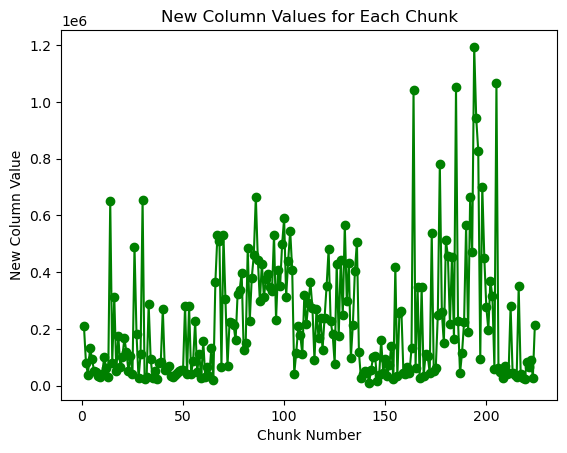

In [53]:

# Plot the new column values
plt.plot(chunk_numbers_new_column, new_column_values_list, marker='o', linestyle='-', color='g')
plt.xlabel('Chunk Number')
plt.ylabel('New Column Value')
plt.title('New Column Values for Each Chunk')
plt.show()

In [57]:
df2 = pd.read_excel('2021 test.xlsx')
df2 = df2.drop((["행정구역(시도)","총인구수-학령인구(명)","행정구역","행정구역(시군구)","유치원 수","출생건수","혼인건수","연도","초등학교 수","사망건수","이혼건수"]), axis=1)
df2

,총인구수(명),학령인구(명)
0,46481,5172
1,24195,2976
2,62624,8715
3,887015,168011
4,68365,7881
...,...,...
218,299182,34250
219,212965,29754
220,462664,64482
221,533042,90527


Weight_총인구수(명)_Chunk1_Original New Column Value:
46360.17170843668
Weight_총인구수(명)_Chunk2_Original New Column Value:
24821.783341257367
Weight_총인구수(명)_Chunk3_Original New Column Value:
63278.550317596644
Weight_총인구수(명)_Chunk4_Original New Column Value:
807305.5360479355
Weight_총인구수(명)_Chunk5_Original New Column Value:
69390.65762812458
Weight_총인구수(명)_Chunk6_Original New Column Value:
100112.47050056561
Weight_총인구수(명)_Chunk7_Original New Column Value:
405521.92543185037
Weight_총인구수(명)_Chunk8_Original New Column Value:
70258.1972040534
Weight_총인구수(명)_Chunk9_Original New Column Value:
44972.51379113644
Weight_총인구수(명)_Chunk10_Original New Column Value:
32426.225987216458
Weight_총인구수(명)_Chunk11_Original New Column Value:
39392.237182967365
Weight_총인구수(명)_Chunk12_Original New Column Value:
65631.94682667777
Weight_총인구수(명)_Chunk13_Original New Column Value:
45373.90702620149
Weight_총인구수(명)_Chunk14_Original New Column Value:
263683.33123245835
Weight_총인구수(명)_Chunk15_Original New Column Value:
5

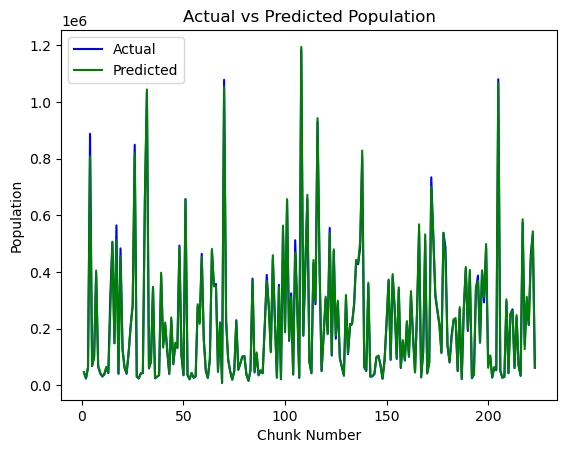

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Lists to store the chunk numbers and corresponding new column values
chunk_numbers_new_column = []
new_column_values_list = []

# 새로운 열을 추가한 값 출력
for i, (key, value) in enumerate(new_column_values.items()):
    print(f"{key} New Column Value:")
    print(value)
    print("=" * 40)

    # Append the chunk number to the list
    chunk_numbers_new_column.append(i + 1)

    # Append the new column value to the list
    new_column_values_list.append(value)

# '총인구수(명)' 열이 df2에 있는지 확인
if '총인구수(명)' in df2.columns:
    # '총인구수(명)' 열의 데이터 가져오기
    actual_values_df2 = df2['총인구수(명)'].tolist()

    # Convert lists to NumPy arrays
    actual_values_array_df2 = np.array(actual_values_df2)

    # Ensure that the lengths match
    min_length = min(len(actual_values_array_df2), len(new_column_values_list))
    actual_values_array_df2 = actual_values_array_df2[:min_length]
    new_column_values_list = new_column_values_list[:min_length]

    # Plot the values
    plt.plot(chunk_numbers_new_column[:min_length], actual_values_array_df2, linestyle='-', color='b', label='Actual')
    plt.plot(chunk_numbers_new_column[:min_length], new_column_values_list,  linestyle='-', color='g', label='Predicted')

    # Calculate MAPE
    mape_score_df2 = np.mean(np.abs((actual_values_array_df2 - np.array(new_column_values_list)) / actual_values_array_df2)) * 100

    # Print the MAPE Score
    print("=" * 40)
    print(f"MAPE Score for '총인구수(명)' in df2: {mape_score_df2:.2f}%")

    # Add labels and legend
    plt.xlabel('Chunk Number')
    plt.ylabel('Population')
    plt.title('Actual vs Predicted Population')
    plt.legend()
    
    # Show the plot
    plt.show()
else:
    print("'총인구수(명)' column not found in df2.")